<a href="https://colab.research.google.com/github/sehab1611251/Clustering/blob/main/Assignment_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the Dataset
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255.

In [ ]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import rand_score
import numpy as np
import pandas as pd
from skimage.io import imread, imshow

In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y_labels = y

In [ ]:
Y_labels

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [ ]:
# Converting X vector elements to 28*28 array
P=np.array(X)
dataContainer=P.tolist()
arr=[]
for i in dataContainer:
  tmp=np.asarray(i).reshape(28,28)
  arr.append(tmp.astype('float32'))

arr=np.asarray(arr)
ImageData=arr # storing original dimension to plot later (28,28)
arr=np.expand_dims(arr,-1) # making the shape (28, 28, 1) as Grayscale image

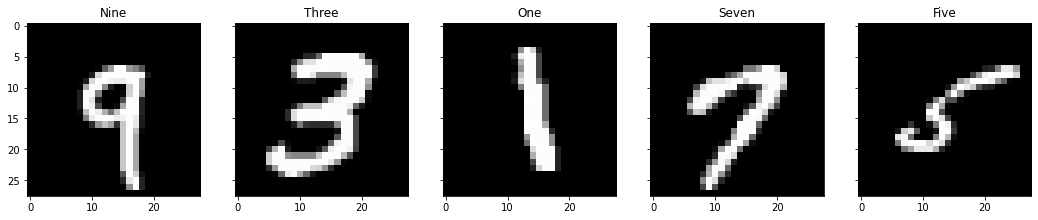

In [ ]:
# Visualizing some random image samples
fig, (ax1, ax4, ax5, ax6, ax7) = plt.subplots(1, 5, figsize=(18, 18), sharex=True, sharey=True)
ax1.imshow(arr[35854], cmap=plt.cm.gray)
ax1.set_title('Nine')
ax4.imshow(arr[7], cmap=plt.cm.gray)
ax4.set_title('Three')
ax5.imshow(arr[6], cmap=plt.cm.gray)
ax5.set_title('One')
ax6.imshow(arr[15], cmap=plt.cm.gray)
ax6.set_title('Seven')
ax7.imshow(arr[11], cmap=plt.cm.gray)
ax7.set_title('Five')
plt.show()

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
S = StandardScaler()

In [ ]:
my_X = S.fit_transform(X)

**Experiment with PCA = 2**

In [ ]:
pca = PCA(n_components=2) # Dimension to be reduced to 2 by PCA
X_pca= pca.fit_transform(my_X) # this case the 784 reduced to 2
X_pca= pd.DataFrame(X_pca) # converting Numpy to Data Frame
X_pca.columns= ['C1',  'C2'] # naming two reduced columns
new_X=X_pca # copying to a new X variable

In [ ]:
new_X

,C1,C2
0,-0.891674,-4.930312
1,8.813502,-7.517423
2,2.204904,9.824854
3,-6.534652,-4.029670
4,-5.251629,3.278780
...,...,...
69995,3.917870,2.892786
69996,3.988366,3.381576
69997,-5.222572,-1.184534
69998,-2.177742,-6.994583


**1.1 Mixture of Gaussians**

In [ ]:
# Defining a plot function
def plot1():
   fig, ax = plt.subplots()
   scatter = ax.scatter(new_X['C1'], new_X['C2'], c=GM_predictions, cmap ='rainbow')
   legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")


Score for Cluster 5 is, Silhouette: 0.3556563997405596 Davies–Bouldin: 0.8946803567242302
Score for Cluster 10 is, Silhouette: 0.3212211226121299 Davies–Bouldin: 0.8398349302859363
Score for Cluster 15 is, Silhouette: 0.32194189342284685 Davies–Bouldin: 0.8563072546837827


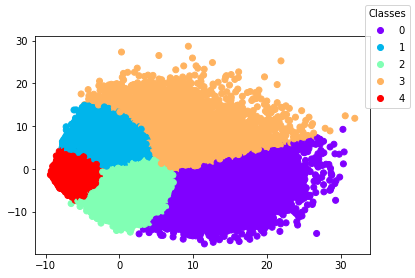

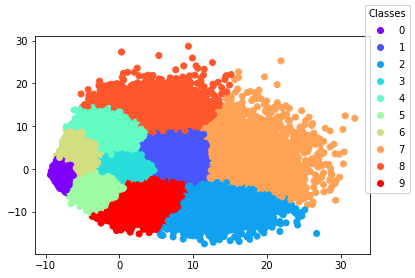

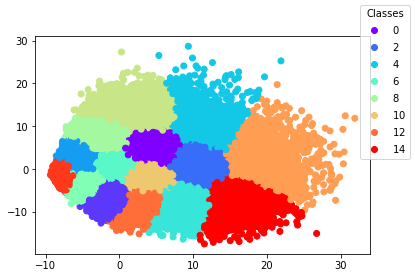

In [ ]:
N_Clusters=[5,10,15] # The number of cluster selected 5,10, and 15
for p in N_Clusters:
  GM = GaussianMixture(n_components=p, covariance_type='diag', reg_covar=1e-06) #Here "n_components" is the number of cluster that the algorithm will find.
  GM.fit(new_X)
  GM_predictions=GM.predict(new_X)
  print("Score for Cluster", p,"is,", "Silhouette:", silhouette_score(new_X, GM_predictions), "Davies–Bouldin:", davies_bouldin_score(new_X, GM_predictions))
  plot1()

**1.2 Mean Shift**

number of estimated clusters for Bandwith 2.7070031236024352 is : 11
Score of R for Bandwidth 2.7070031236024352 is: 0.28989394767690574
number of estimated clusters for Bandwith 3.0145963125095268 is : 8
Score of R for Bandwidth 3.0145963125095268 is: 0.263473055106474
number of estimated clusters for Bandwith 3.2917272794438484 is : 5
Score of R for Bandwidth 3.2917272794438484 is: 0.21161951643638505


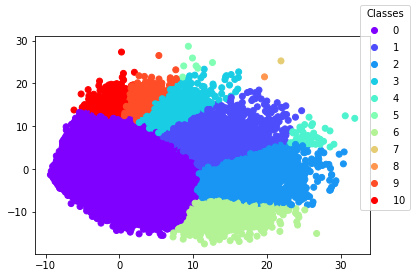

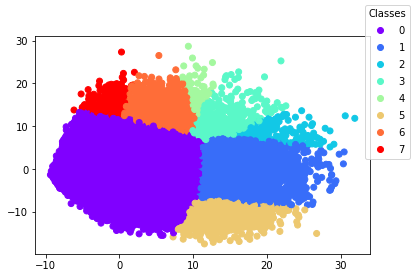

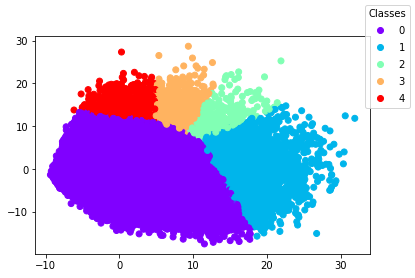

In [ ]:
i=0
Quantile_values=[.04, .05, .06] # Quantile values ranges between 0 and 1
new_X2=new_X[:60000]  # Taking 60 thousand samples from X
Y_labels2=Y_labels[:60000] # Taking corresponding Y labels to calculate Rand Index later
for p in Quantile_values:
  Bandwidth = estimate_bandwidth(new_X2, quantile=Quantile_values[i], n_samples=len(new_X2)) # Bandwith is the size of the “window” in which I calculate the mean.
  i=i+1
  MS=MeanShift(bandwidth=Bandwidth, bin_seeding=True)
  MS.fit(new_X2)
  MS_predictions=MS.predict(new_X2)

  MS_labels = MS.labels_ # code to print the number of clusters
  MS_cluster_centers =  MS.cluster_centers_
  unique_labels= np.unique(MS_labels)
  N_clusters= len(unique_labels)
  print("number of estimated clusters for Bandwith",Bandwidth,"is : %d" % N_clusters)

  R = rand_score(Y_labels2, MS_predictions) # Calculating Rand Index
  print("Score of R for Bandwidth",Bandwidth,"is:",R)

  fig, ax = plt.subplots() # Plotting the extracted clusters
  scatter = ax.scatter(new_X2['C1'], new_X2['C2'], c=MS_predictions, cmap ='rainbow')
  legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")

**1.3. Normalized Cut**

Score for Cluster 5 is, Silhouette: 0.4783341117358494 Davies–Bouldin: 0.614120299550527
Score for Cluster 10 is, Silhouette: 0.351541426006961 Davies–Bouldin: 0.7940944928318452
Score for Cluster 15 is, Silhouette: 0.32589158371298727 Davies–Bouldin: 0.704274406916228


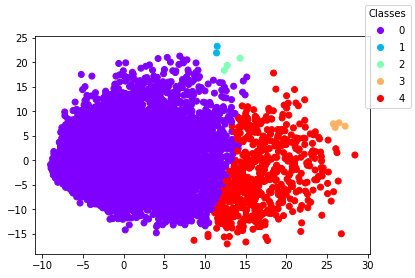

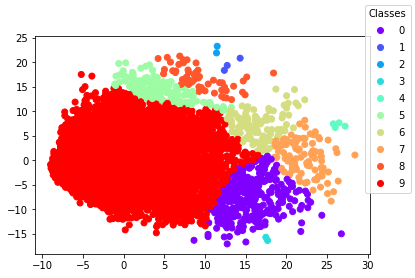

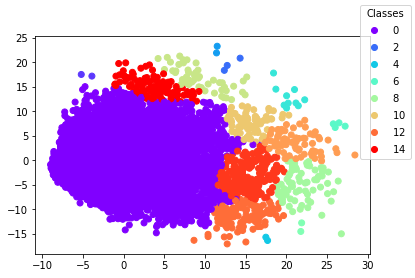

In [ ]:
X_data=new_X[:10000]  # taking 10 thousand samples since it takes so much computation time
N_Clusters=[5,10,15] # The number of cluster selected 5,10, and 15
for p in N_Clusters:
  NC= SpectralClustering(n_clusters=p) # By default uses RBF Kernel
  NC.fit(X_data)
  NC_predictions=NC.fit_predict(X_data)
  print("Score for Cluster", p,"is,", "Silhouette:", silhouette_score(X_data, NC_predictions), "Davies–Bouldin:", davies_bouldin_score(X_data, NC_predictions))

  fig, ax = plt.subplots() # Plotting the extracted clusters
  scatter = ax.scatter(X_data['C1'], X_data['C2'], c=NC_predictions, cmap ='rainbow')
  legend = fig.legend(*scatter.legend_elements(), loc='upper right', title="Classes")

**Experiment with PCA = 10**

In [ ]:
pca = PCA(n_components=10) # Dimension to be reduced to 10 by PCA
X_pca= pca.fit_transform(my_X) # this case the 784 reduced to 10
X_pca= pd.DataFrame(X_pca) # converting Numpy to Data Frame
X_pca.columns= ['C1',  'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'] # naming ten reduced columns
new_X=X_pca # copying to a new X variable

In [ ]:
new_X

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-0.891713,-4.929730,-0.093276,-8.064095,-0.751159,1.060352,0.298340,1.369266,-1.120760,2.186647
1,8.813525,-7.517599,-3.714091,-1.766112,0.891666,-5.110204,-0.139600,3.206005,-0.282889,-0.972943
2,2.204837,9.824443,-5.752484,1.479803,4.397197,2.502625,18.928037,3.884476,2.441348,-0.014505
3,-6.534626,-4.029660,3.524034,-0.218041,5.606169,3.494912,1.444842,-4.689653,-0.618633,-2.554160
4,-5.251626,3.278794,-6.182053,1.462640,-1.668069,-0.587921,-0.576183,-3.094335,-0.056836,-0.895989
...,...,...,...,...,...,...,...,...,...,...
69995,3.917884,2.892426,9.949125,-2.026844,-0.893552,10.703850,-5.189980,1.928094,-4.789030,-3.690067
69996,3.988383,3.381629,7.713989,-7.300259,-2.416642,-2.900401,-1.112441,6.763913,-2.139963,-0.041135
69997,-5.222595,-1.184294,-4.754679,0.148015,-4.383389,4.665213,-5.145719,-1.319145,0.656327,0.678631
69998,-2.177723,-6.994937,-3.228712,1.890180,4.330889,-0.845130,-3.365863,1.840406,9.602283,2.758468


**2.1 Mixture of Gaussian**

In [ ]:
N_Clusters=[5,7,10,13,15] # The number of cluster selected 5, 7, 10, 13, and 15
for p in N_Clusters:
  GM = GaussianMixture(n_components=p, covariance_type='diag', reg_covar=1e-06) #Here "n_components" is the number of cluster that the algorithm will find.
  GM.fit(new_X)
  GM_predictions=GM.predict(new_X)
  print("Score for Cluster", p,"is,", "Silhouette:", silhouette_score(new_X, GM_predictions), "Davies–Bouldin:", davies_bouldin_score(new_X, GM_predictions))

Score for Cluster 5 is, Silhouette: 0.057017509711864194 Davies–Bouldin: 2.162266053403999
Score for Cluster 7 is, Silhouette: 0.09282063118397735 Davies–Bouldin: 1.978963951940823
Score for Cluster 10 is, Silhouette: 0.12115997401326543 Davies–Bouldin: 1.6933392518905452
Score for Cluster 13 is, Silhouette: 0.13874264936985814 Davies–Bouldin: 1.6588952934066326
Score for Cluster 15 is, Silhouette: 0.12371698482035949 Davies–Bouldin: 1.6155290374759343


**2.2 Mean Shift**

In [ ]:
i=0
Quantile_values=[.05, .06, .07] # Quantile values ranges between 0 and 1
new_X2=new_X[:60000]  # Taking 60 thousand samples from X
Y_labels2=Y_labels[:60000] # Taking corresponding Y labels to calculate Rand Index later
for p in Quantile_values:
  Bandwidth = estimate_bandwidth(new_X2, quantile=Quantile_values[i], n_samples=len(new_X2)) # Bandwith is the size of the “window” in which I calculate the mean.
  i=i+1
  MS=MeanShift(bandwidth=Bandwidth, bin_seeding=True)
  MS.fit(new_X2)
  MS_predictions=MS.predict(new_X2)

  MS_labels = MS.labels_ # code to print the number of clusters
  MS_cluster_centers =  MS.cluster_centers_
  unique_labels= np.unique(MS_labels)
  N_clusters= len(unique_labels)
  print("number of estimated clusters for Bandwith",Bandwidth,"is : %d" % N_clusters)

  R = rand_score(Y_labels2, MS_predictions)
  print("Score of R for Bandwidth",Bandwidth,"is:",R)

number of estimated clusters for Bandwith 11.180863357581064 is : 15
Score of R for Bandwidth 11.180863357581064 is: 0.20561099018316972
number of estimated clusters for Bandwith 11.626474751481208 is : 11
Score of R for Bandwidth 11.626474751481208 is: 0.1899663527725462
number of estimated clusters for Bandwith 12.017345073705075 is : 7
Score of R for Bandwidth 12.017345073705075 is: 0.16154514408573475


**2.3 Normalized Cut**

In [ ]:
X_data=new_X[:30000]  # taking 30 thousand samples to reduce computation time
N_Clusters=[5,7,10,13,15] # The number of cluster selected 5, 7, 10, 13, and 15
for p in N_Clusters:
  NC= SpectralClustering(n_clusters=p, affinity='nearest_neighbors') # Using Nearest Neighbors as Kernel
  NC.fit(X_data)
  NC_predictions=NC.fit_predict(X_data)
  print("Score for Cluster", p,"is,", "Silhouette:", silhouette_score(X_data, NC_predictions), "Davies–Bouldin:", davies_bouldin_score(X_data, NC_predictions))

Score for Cluster 5 is, Silhouette: 0.01804935664859487 Davies–Bouldin: 1.854130718530136
Score for Cluster 7 is, Silhouette: 0.06204994782971277 Davies–Bouldin: 1.7494522682344453
Score for Cluster 10 is, Silhouette: 0.052771466062302 Davies–Bouldin: 1.644311767395174
Score for Cluster 13 is, Silhouette: 0.062281746643974324 Davies–Bouldin: 1.6144044219903693
Score for Cluster 15 is, Silhouette: 0.06574155099660156 Davies–Bouldin: 1.51110425789647


**Experiment with PCA = 100**

In [ ]:
pca = PCA(n_components=100) # Dimension to be reduced to 100 by PCA
X_pca= pca.fit_transform(my_X) # this case the 784 reduced to 100
X_pca= pd.DataFrame(X_pca) # converting Numpy to Data Frame
new_X=X_pca # copying to a new X variable

In [ ]:
new_X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.891723,-4.929716,-0.093053,-8.064267,-0.750964,1.051995,0.283780,1.423889,-1.167846,2.407351,...,-0.528041,-0.851049,-1.015612,-0.421354,0.455709,-0.644204,-1.244260,1.428912,3.190557,-2.970206
1,8.813531,-7.517558,-3.714184,-1.766165,0.891517,-5.107972,-0.134876,3.197209,-0.238506,-1.003163,...,-0.908168,0.593127,0.245245,0.092457,-0.638139,-0.600522,-0.358725,-0.702160,-0.027758,-0.819528
2,2.204836,9.824444,-5.752494,1.479573,4.397972,2.507427,18.928265,3.889726,2.444208,-0.145347,...,-1.189325,-0.345923,-1.881198,1.845816,0.559779,-1.446481,-1.633404,-1.799272,-1.404651,0.661275
3,-6.534626,-4.029670,3.524019,-0.218095,5.606261,3.493701,1.445119,-4.684033,-0.614002,-2.533954,...,-0.099287,-0.509053,0.206263,-0.458381,0.564240,0.339490,-0.034454,0.528249,0.199485,-0.021410
4,-5.251622,3.278832,-6.182218,1.462629,-1.667993,-0.580706,-0.565713,-3.129788,0.006231,-0.973030,...,-1.269909,0.779256,0.160118,-0.286204,-1.634982,1.824713,0.096965,1.372690,-1.360842,0.863191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,3.917881,2.892408,9.949224,-2.026813,-0.893670,10.701365,-5.194485,1.941584,-4.811851,-3.656395,...,-0.225086,3.030676,1.010021,-0.785744,-1.725127,-0.499806,-1.292458,0.074034,-0.604540,0.297734
69996,3.988381,3.381645,7.714126,-7.300251,-2.417368,-2.902464,-1.120329,6.798066,-2.167306,0.092300,...,-0.131386,-0.742881,-0.537780,0.036665,0.963764,-0.952255,0.824395,-0.104572,0.257702,0.147204
69997,-5.222594,-1.184310,-4.754727,0.148151,-4.383907,4.668399,-5.142021,-1.334902,0.659966,0.548174,...,0.583852,-1.068884,-0.026103,0.043158,0.469727,0.738150,0.814015,1.393520,0.485498,0.354538
69998,-2.177734,-6.995062,-3.228745,1.890155,4.332327,-0.846153,-3.362848,1.797080,9.551050,2.532130,...,0.295034,-0.172694,0.790527,3.464662,0.869810,-1.751977,0.279996,-1.599678,1.035573,0.091361


**3.1 Mixture of Gaussians**

In [ ]:
N_Clusters=[5,7,10,13,15] # The number of cluster selected 5,7,10,13, and 15
for p in N_Clusters:
  GM = GaussianMixture(n_components=p, covariance_type='diag', reg_covar=1e-06) #Here "n_components" is the number of cluster that the algorithm will find.
  GM.fit(new_X)
  GM_predictions=GM.predict(new_X)
  print("Score for Cluster", p,"is,", "Silhouette:", silhouette_score(new_X, GM_predictions), "Davies–Bouldin:", davies_bouldin_score(new_X, GM_predictions))

Score for Cluster 5 is, Silhouette: -0.0647935171246506 Davies–Bouldin: 7.245163512193892
Score for Cluster 7 is, Silhouette: -0.07573480965771516 Davies–Bouldin: 7.543706915753646
Score for Cluster 10 is, Silhouette: -0.03489964415306849 Davies–Bouldin: 6.04606948790577
Score for Cluster 13 is, Silhouette: -0.02176922737102516 Davies–Bouldin: 5.539502387062749


/usr/local/lib/python3.8/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.


Score for Cluster 15 is, Silhouette: -0.045636777850323204 Davies–Bouldin: 5.841914671365201


**3.2 Mean Shift**

In [ ]:
i=0
Quantile_values=[.00005, .00006, .00007] # Quantile values ranges between 0 and 1
new_X2=new_X[:60000]  # Taking 60 thousand samples from X
Y_labels2=Y_labels[:60000] # Taking corresponding Y labels to calculate Rand Index later
for p in Quantile_values:
  Bandwidth = estimate_bandwidth(new_X2, quantile=Quantile_values[i], n_samples=len(new_X2)) # Bandwith is the size of the “window” in which I calculate the mean.
  i=i+1
  MS=MeanShift(bandwidth=Bandwidth, bin_seeding=True)
  MS.fit(new_X2)
  MS_predictions=MS.predict(new_X2)

  MS_labels = MS.labels_ # code to print the number of clusters
  MS_cluster_centers =  MS.cluster_centers_
  unique_labels= np.unique(MS_labels)
  N_clusters= len(unique_labels)
  print("number of estimated clusters for Bandwith",Bandwidth,"is : %d" % N_clusters)

  R = rand_score(Y_labels2, MS_predictions)
  print("Score of R for Bandwidth",Bandwidth,"is:",R)

number of estimated clusters for Bandwith 9.085001300153449 is : 2
Score of R for Bandwidth 9.085001300153449 is: 0.4584216892503764
number of estimated clusters for Bandwith 9.085001300153449 is : 2
Score of R for Bandwidth 9.085001300153449 is: 0.4584216892503764
number of estimated clusters for Bandwith 9.543218258415154 is : 2
Score of R for Bandwidth 9.543218258415154 is: 0.45388750979182985


**3.3 Normalized Cut**

In [ ]:
X_data=new_X[:30000]  # taking 30 thousand samples
N_Clusters=[5,7,9,11,13,15] # The number of cluster selected 5, 7, 10, 13, and 15
for p in N_Clusters:
  NC= SpectralClustering(n_clusters=p, affinity='nearest_neighbors') # Using Nearest Neighbors as Kernel
  NC.fit(X_data)
  NC_predictions=NC.fit_predict(X_data)
  print("Score for Cluster", p,"is,", "Silhouette:", silhouette_score(X_data, NC_predictions), "Davies–Bouldin:", davies_bouldin_score(X_data, NC_predictions))

Score for Cluster 5 is, Silhouette: -0.08354836006705435 Davies–Bouldin: 3.0372170962478817
Score for Cluster 7 is, Silhouette: -0.058696961172985423 Davies–Bouldin: 3.0095746586105148
Score for Cluster 9 is, Silhouette: -0.04580437484934361 Davies–Bouldin: 2.818807710762271
Score for Cluster 11 is, Silhouette: -0.03700066544753641 Davies–Bouldin: 2.681006003135326
Score for Cluster 13 is, Silhouette: -0.04538600987422166 Davies–Bouldin: 2.543666655655265
Score for Cluster 15 is, Silhouette: -0.029847917654997256 Davies–Bouldin: 2.527741575543838
